In [4]:
import matplotlib.pyplot as plt
import numpy as np
from math import pi, cos, sin, sqrt, acos, asin

In [8]:
dt = 0.0001
T = 2

G = 100 * pi
Uinf = 0
angle = 0

x0 = 0
y0 = 1
xg0 = 0
yg0 = 0

# Без потока с шагом в 0.0001 секунду. Долго считает, но рисует окружность

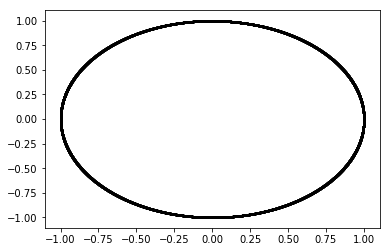

In [3]:
t = 0
x = x0
y = y0
plt.scatter(x, y, color="black", s=1)
while t <= T:
    r = sqrt((x - xg0)**2 + (y - yg0)**2)
    Us = G / (2 * pi * r)
    x = x + (Uinf * cos(angle) + Us * (y - yg0) / r) * dt
    y = y + (Uinf * sin(angle) - Us * (x - xg0) / r) * dt
    #print("x = ", x, " y = ", y)
    plt.scatter(x, y, color="black", s=1)
    t += dt

In [28]:
dt = 0.01
T = 2

G = 100
Uinf = 0
angle = 0

x0 = 0
y0 = 1
xg0 = 0
yg0 = 0

# Без потока, с шагом в 0.01

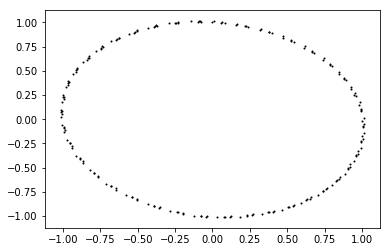

In [29]:
t = 0
x = x0
y = y0
plt.scatter(x, y, color="black", s=1)
while t <= T:
    r = sqrt((x - xg0)**2 + (y - yg0)**2)
    Us = G / (2 * pi * r)
    x = x + (Uinf * cos(angle) + Us * (y - yg0) / r) * dt
    y = y + (Uinf * sin(angle) - Us * (x - xg0) / r) * dt
    #print("x = ", x, " y = ", y)
    plt.scatter(x, y, color="black", s=1)
    t += dt

# Без потока, с шагом 0.01, но с подсчётом по дуге

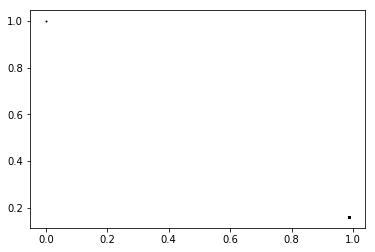

In [31]:
t = 0
x = x0
y = y0
plt.scatter(x, y, color="black", s=1)
while t <= T:
    r = sqrt((x - xg0)**2 + (y - yg0)**2)
    Us = G / (2 * pi * r)
    cur_alpha_x = acos((x - xg0) / r)
    new_alpha_x = cur_alpha - Us * dt / r
    dxs = r * cos(cur_alpha - new_alpha) - r * cos(cur_alpha)
    dys = r * sin(cur_alpha - new_alpha) - r * sin(cur_alpha)
    #print(dys)
    x = x + Uinf * cos(angle) * dt + dxs
    y = y + Uinf * sin(angle) * dt + dys
    #print("x = ", x, " y = ", y)
    plt.scatter(x, y, color="black", s=1)
    t += dt

# Functions to calculate

In [2]:
class Vortex:
    def __init__(self, x, y, G):
        self.x = x
        self.y = y
        self.G = G
        
    def displace(self, x, y, dt):
        dx = []
        dy = []
        for i in range(len(x)):
            r = sqrt((self.x - x[i])**2 + (self.y - y[i])**2)
            Us = self.G / (2 * pi * r)
            if (y[i] > self.y):
                cur_alpha = acos((x[i] - self.x) / r)
            else:
                cur_alpha = 2 * pi - acos((x[i] - self.x) / r)
            new_alpha = cur_alpha - Us * dt / r
            dx.append(r * cos(new_alpha) - r * cos(cur_alpha))
            dy.append(r * sin(new_alpha) - r * sin(cur_alpha))
            #print("x: ", x[0], " y: ", y[0], " Us: ", Us, " dx:", dx[0], " dy: ", dy[0])
        return dx, dy
                
    def displace_tangent(self, x, y, dt):
        dx = []
        dy = []
        for i in range(len(x)):
            r = sqrt((self.x - x[i])**2 + (self.y - y[i])**2)
            Us = self.G / (2 * pi * r)
            dx.append((Us * (y[i] - self.y) / r) * dt)
            dy.append((Us * (self.x - x[i]) / r) * dt)
        return dx, dy

In [3]:
class Trajectory:
    def __init__(self, vortexes_x, vortexes_y, free_vortexes_x, free_vortexes_y, x, y):
        self.vortexes_x = vortexes_x
        self.vortexes_y = vortexes_y
        self.free_vortexes_x = free_vortexes_x
        self.free_vortexes_y = free_vortexes_y
        self.x = x
        self.y = y
    def draw(self):
        plt.plot(self.x, self.y, color='r')
        for i in range(len(self.vortexes_x)):
            plt.scatter(self.vortexes_x[i], self.vortexes_y[i], color='b')
        free_vortexes_x = np.transpose(self.free_vortexes_x)
        free_vortexes_y = np.transpose(self.free_vortexes_y)
        for i in range(len(free_vortexes_x)):
            plt.plot(free_vortexes_x[i], free_vortexes_y[i], color='g')

In [4]:
class Model:
    def __init__(self, vortexes, free_vortexes, Uinf, angle, x, y):
        self.vortexes = vortexes
        self.free_vortexes = free_vortexes
        self.x = x
        self.y = y
        self.Uinf = Uinf
        self.angle = angle
        
    def calculate(self, T, dt):
        t = 0
        vortexes = self.vortexes
        free_vortexes = self.free_vortexes
        Uinf = self.Uinf
        angle = self.angle
        x = self.x
        y = self.y
        free_vortexes = self.free_vortexes
        trajectory = Trajectory([el.x for el in vortexes], [el.y for el in vortexes], [[el.x for el in free_vortexes]],\
                                [[el.y for el in free_vortexes]], [self.x], [self.y])
        while t <= T:
            old_vortexes = free_vortexes
            old_x = trajectory.x[len(trajectory.x) - 1]
            old_y = trajectory.y[len(trajectory.y) - 1]
            trajectory.x.append(trajectory.x[len(trajectory.x) - 1])
            trajectory.y.append(trajectory.y[len(trajectory.y) - 1])
            trajectory.free_vortexes_x.append([el for el in trajectory.free_vortexes_x[len(trajectory.free_vortexes_x) - 1]])
            trajectory.free_vortexes_y.append([el for el in trajectory.free_vortexes_y[len(trajectory.free_vortexes_y) - 1]])
            for i in range(len(old_vortexes)):
                dx, dy = old_vortexes[i].displace([old_x], [old_y], dt)
                trajectory.x[len(trajectory.x) - 1] += dx[0]
                trajectory.y[len(trajectory.y) - 1] += dy[0]
                for j in range(len(free_vortexes)):
                    if i != j:
                        dx, dy = old_vortexes[i].displace([old_vortexes[j].x], [old_vortexes[j].y], dt)
                        free_vortexes[j].x += dx[0]
                        free_vortexes[j].y += dy[0]
                        trajectory.free_vortexes_x[len(trajectory.free_vortexes_x) - 1][i] += dx[0]
                        trajectory.free_vortexes_y[len(trajectory.free_vortexes_y) - 1][i] += dy[0]
            
            for i in range(len(vortexes)):
                dx, dy = vortexes[i].displace([old_x], [old_y], dt)
                trajectory.x[len(trajectory.x) - 1] += dx[0]
                trajectory.y[len(trajectory.y) - 1] += dy[0]
                for j in range(len(free_vortexes)):
                        dx, dy = vortexes[i].displace([old_vortexes[j].x], [old_vortexes[j].y], dt)
                        free_vortexes[j].x += dx[0]
                        free_vortexes[j].y += dy[0]
                        trajectory.free_vortexes_x[len(trajectory.free_vortexes_x) - 1][i] += dx[0]
                        trajectory.free_vortexes_y[len(trajectory.free_vortexes_y) - 1][i] += dy[0]
                        
            for i in range(len(free_vortexes)):
                free_vortexes[i].x += Uinf * cos(angle) * dt
                free_vortexes[i].y += Uinf * sin(angle) * dt
                trajectory.free_vortexes_x[len(trajectory.free_vortexes_x) - 1][i] += Uinf * cos(angle) * dt
                trajectory.free_vortexes_y[len(trajectory.free_vortexes_y) - 1][i] += Uinf * sin(angle) * dt
            trajectory.x[len(trajectory.x) - 1] += Uinf * cos(angle) * dt
            trajectory.y[len(trajectory.y) - 1] += Uinf * sin(angle) * dt
            t += dt
        return trajectory
        
    def calculate_tangent(self, T, dt):
        t = 0
        vortexes = self.vortexes
        free_vortexes = self.free_vortexes
        Uinf = self.Uinf
        angle = self.angle
        x = self.x
        y = self.y
        free_vortexes = self.free_vortexes
        trajectory = Trajectory([el.x for el in vortexes], [el.y for el in vortexes], [[el.x for el in free_vortexes]],\
                                [[el.y for el in free_vortexes]], [self.x], [self.y])
        while t <= T:
            old_vortexes = free_vortexes
            old_x = trajectory.x[len(trajectory.x) - 1]
            old_y = trajectory.y[len(trajectory.y) - 1]
            trajectory.x.append(trajectory.x[len(trajectory.x) - 1])
            trajectory.y.append(trajectory.y[len(trajectory.y) - 1])
            trajectory.free_vortexes_x.append([el for el in trajectory.free_vortexes_x[len(trajectory.free_vortexes_x) - 1]])
            trajectory.free_vortexes_y.append([el for el in trajectory.free_vortexes_y[len(trajectory.free_vortexes_y) - 1]])
            for i in range(len(old_vortexes)):
                dx, dy = old_vortexes[i].displace_tangent([old_x], [old_y], dt)
                trajectory.x[len(trajectory.x) - 1] += dx[0]
                trajectory.y[len(trajectory.y) - 1] += dy[0]
                for j in range(len(free_vortexes)):
                    if i != j:
                        dx, dy = old_vortexes[i].displace_tangent([old_vortexes[j].x], [old_vortexes[j].y], dt)
                        free_vortexes[j].x += dx[0]
                        free_vortexes[j].y += dy[0]
                        trajectory.free_vortexes_x[len(trajectory.free_vortexes_x) - 1][i] += dx[0]
                        trajectory.free_vortexes_y[len(trajectory.free_vortexes_y) - 1][i] += dy[0]
            
            for i in range(len(vortexes)):
                dx, dy = vortexes[i].displace_tangent([old_x], [old_y], dt)
                trajectory.x[len(trajectory.x) - 1] += dx[0]
                trajectory.y[len(trajectory.y) - 1] += dy[0]
                for j in range(len(free_vortexes)):
                        dx, dy = vortexes[i].displace_tangent([old_vortexes[j].x], [old_vortexes[j].y], dt)
                        free_vortexes[j].x += dx[0]
                        free_vortexes[j].y += dy[0]
                        trajectory.free_vortexes_x[len(trajectory.free_vortexes_x) - 1][i] += dx[0]
                        trajectory.free_vortexes_y[len(trajectory.free_vortexes_y) - 1][i] += dy[0]
                        
            for i in range(len(free_vortexes)):
                free_vortexes[i].x += Uinf * cos(angle) * dt
                free_vortexes[i].y += Uinf * sin(angle) * dt
                trajectory.free_vortexes_x[len(trajectory.free_vortexes_x) - 1][i] += Uinf * cos(angle) * dt
                trajectory.free_vortexes_y[len(trajectory.free_vortexes_y) - 1][i] += Uinf * sin(angle) * dt
            trajectory.x[len(trajectory.x) - 1] += Uinf * cos(angle) * dt
            trajectory.y[len(trajectory.y) - 1] += Uinf * sin(angle) * dt
            t += dt
        return trajectory

In [97]:
dt = 0.01
T = 1

G = 15
Uinf = 40
angle = 0

In [98]:
v = Vortex(0, 10, G)

In [99]:
model = Model([v], [], 40, angle, -20, 10)

In [100]:
result = model.calculate_tangent(T, dt)

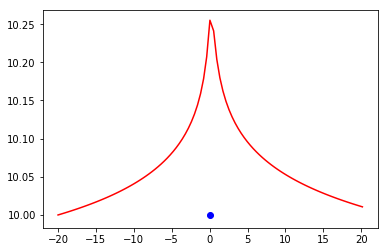

In [101]:
result.draw()

In [5]:
def draw_1(trajectory_1, trajectory_2):
    plt.figure(figsize=(30, 20))
    plt.tick_params(labelsize=20)
    plt.plot(trajectory_1.x, trajectory_1.y, color='r')
    plt.plot(trajectory_2.x, trajectory_2.y, color='g')
    plt.scatter(trajectory_1.vortexes_x[0], trajectory_1.vortexes_y[0], color='b')

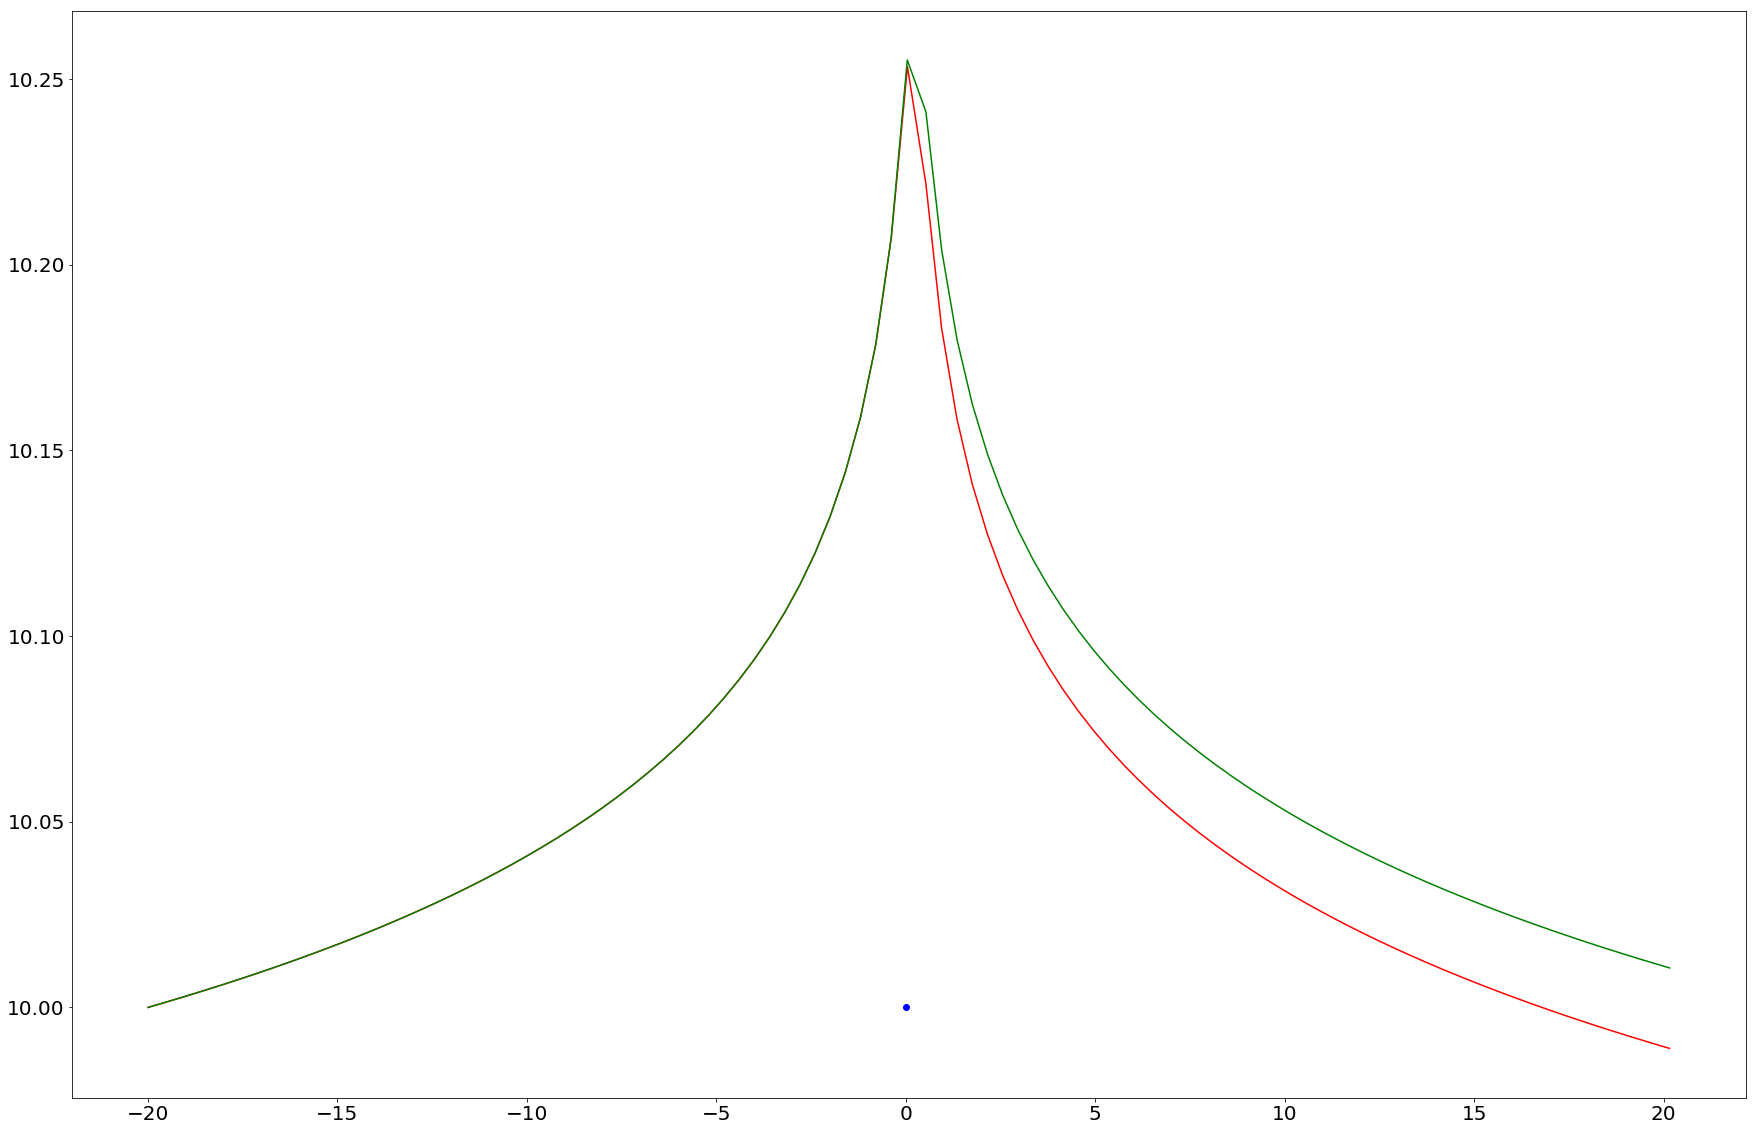

In [115]:
draw_1(model.calculate(T, dt), model.calculate_tangent(T, dt))

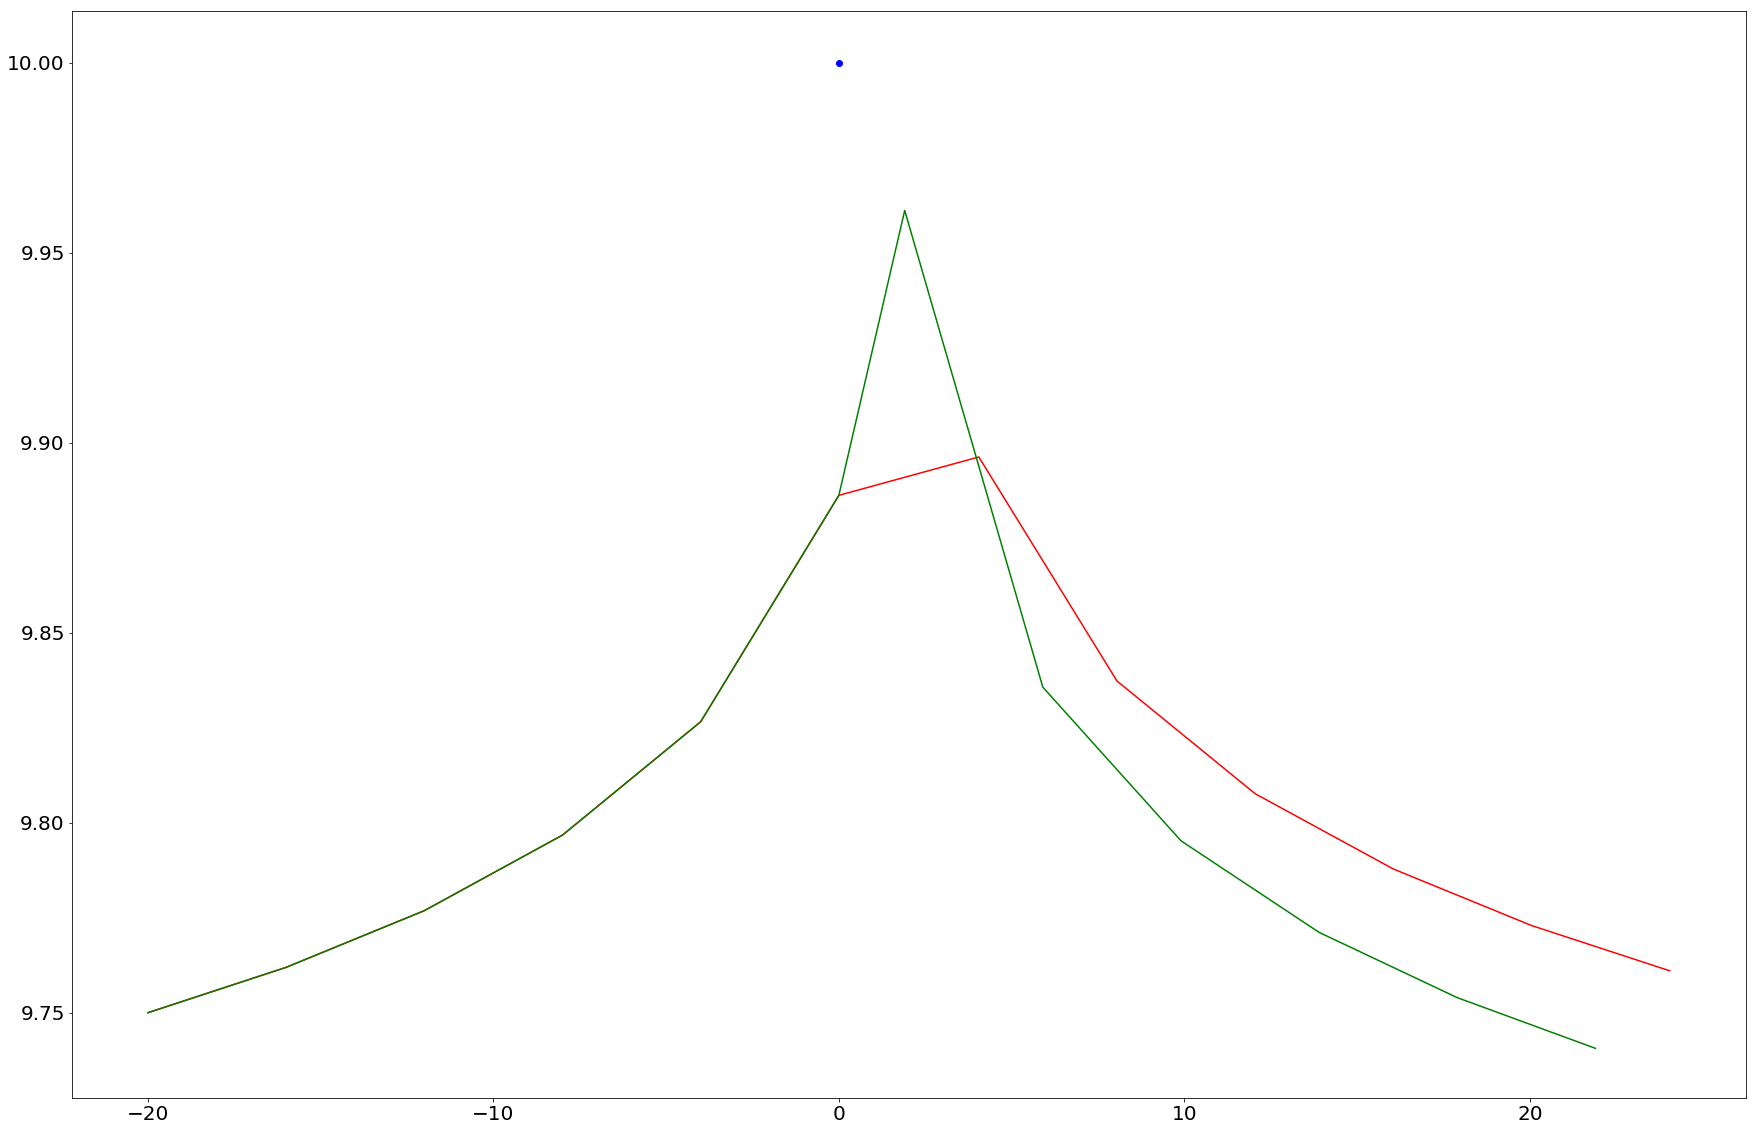

In [130]:
model = Model([v], [], 40, angle, -20, 9.75)
draw_1(model.calculate(T, 0.1), model.calculate_tangent(T, 0.1))

In [149]:
xs = -5
xe = 20
ys = 0
ye = 15
step = 1
xn = int((xe - xs) / step) + 1
yn = int((ye - ys) / step) + 1

In [150]:
x = np.linspace(xs, xe, xn)
y = np.linspace(ys, ye, yn)
X, Y = np.meshgrid(x, y)

In [151]:
U = np.zeros((yn,xn))
V = np.zeros((yn,xn))

In [173]:
for j in range(yn):
    for i in range(xn):  
        r = sqrt((0 - X[j][i])**2 + (10 - Y[j][i])**2)
        if r == 0:
            U[j][i] = 0
            V[j][i] = 0
            continue
        Us = 15 / (2 * pi * r)
        U[j][i] = 0.5 + (Us * (Y[j][i] - 10) / r)
        V[j][i] = (Us * (0 - X[j][i]) / r)

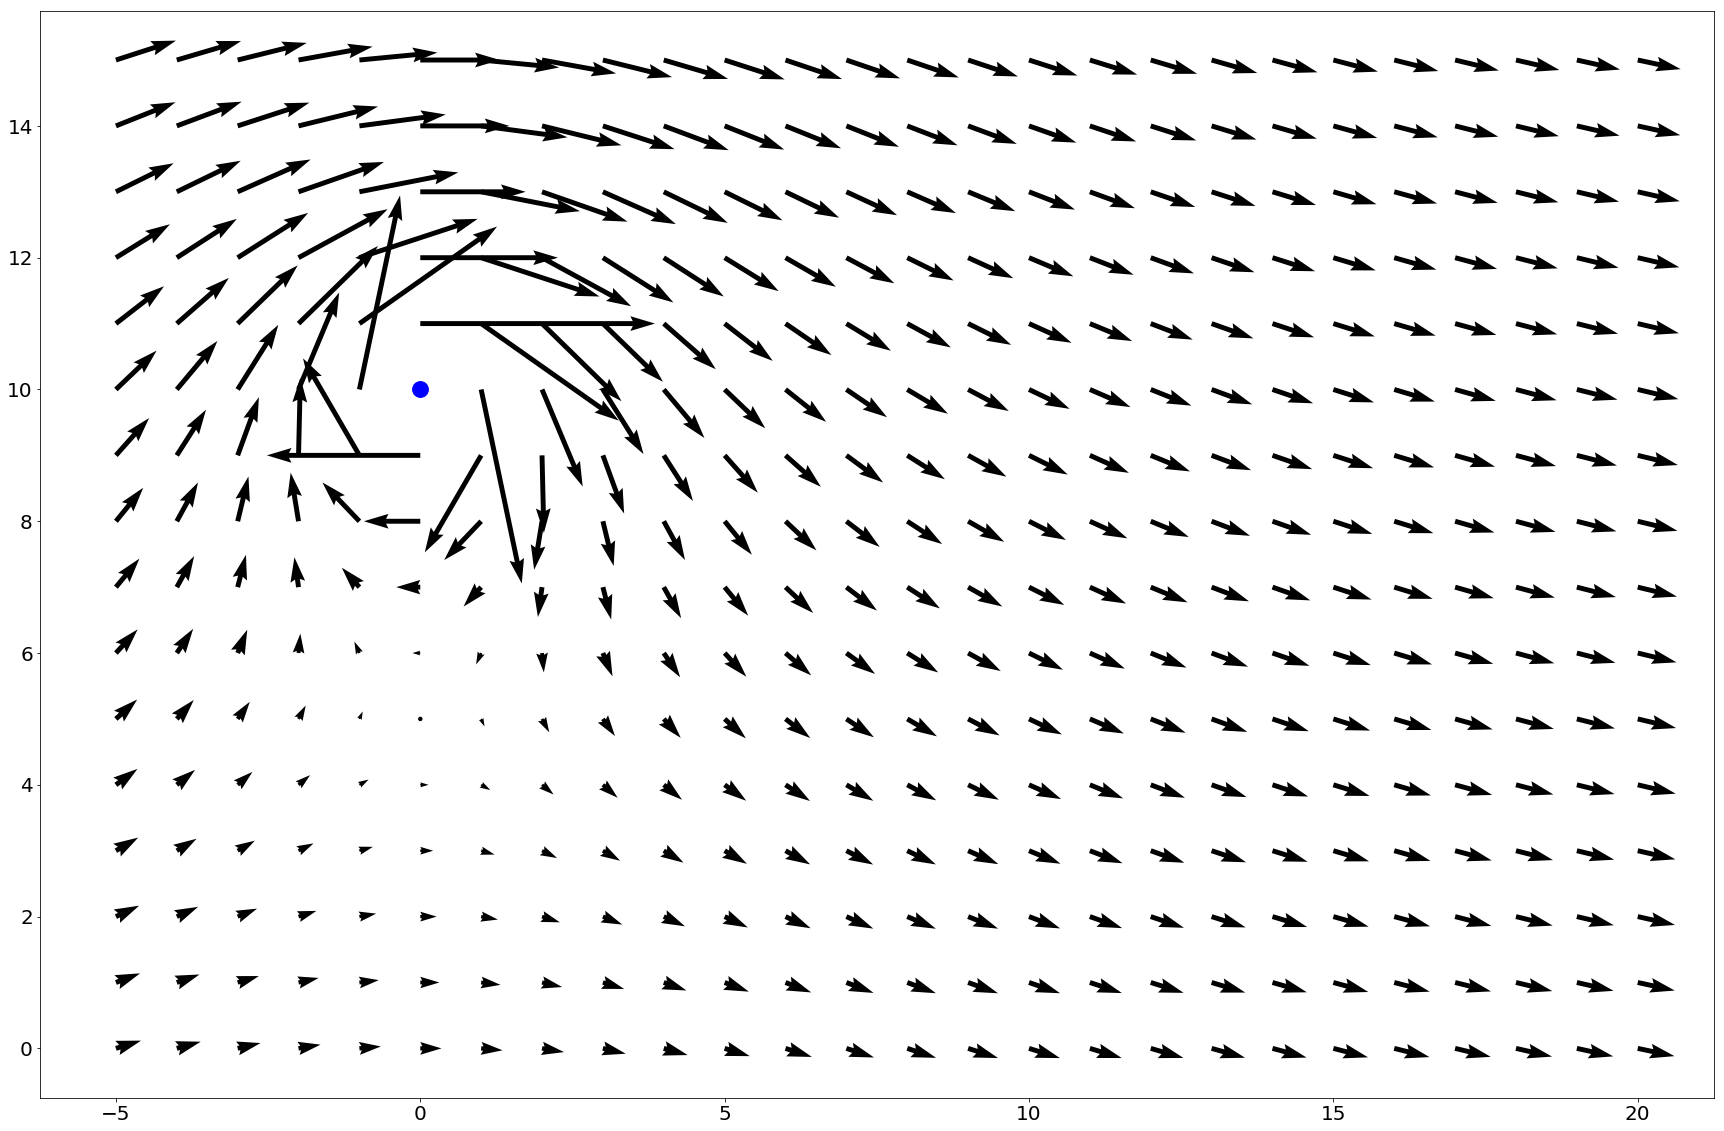

In [174]:
plt.figure(figsize=(30, 20))
plt.tick_params(labelsize=20)
plt.quiver(X, Y, U, V)
plt.scatter(0, 10, color='b', s=250)

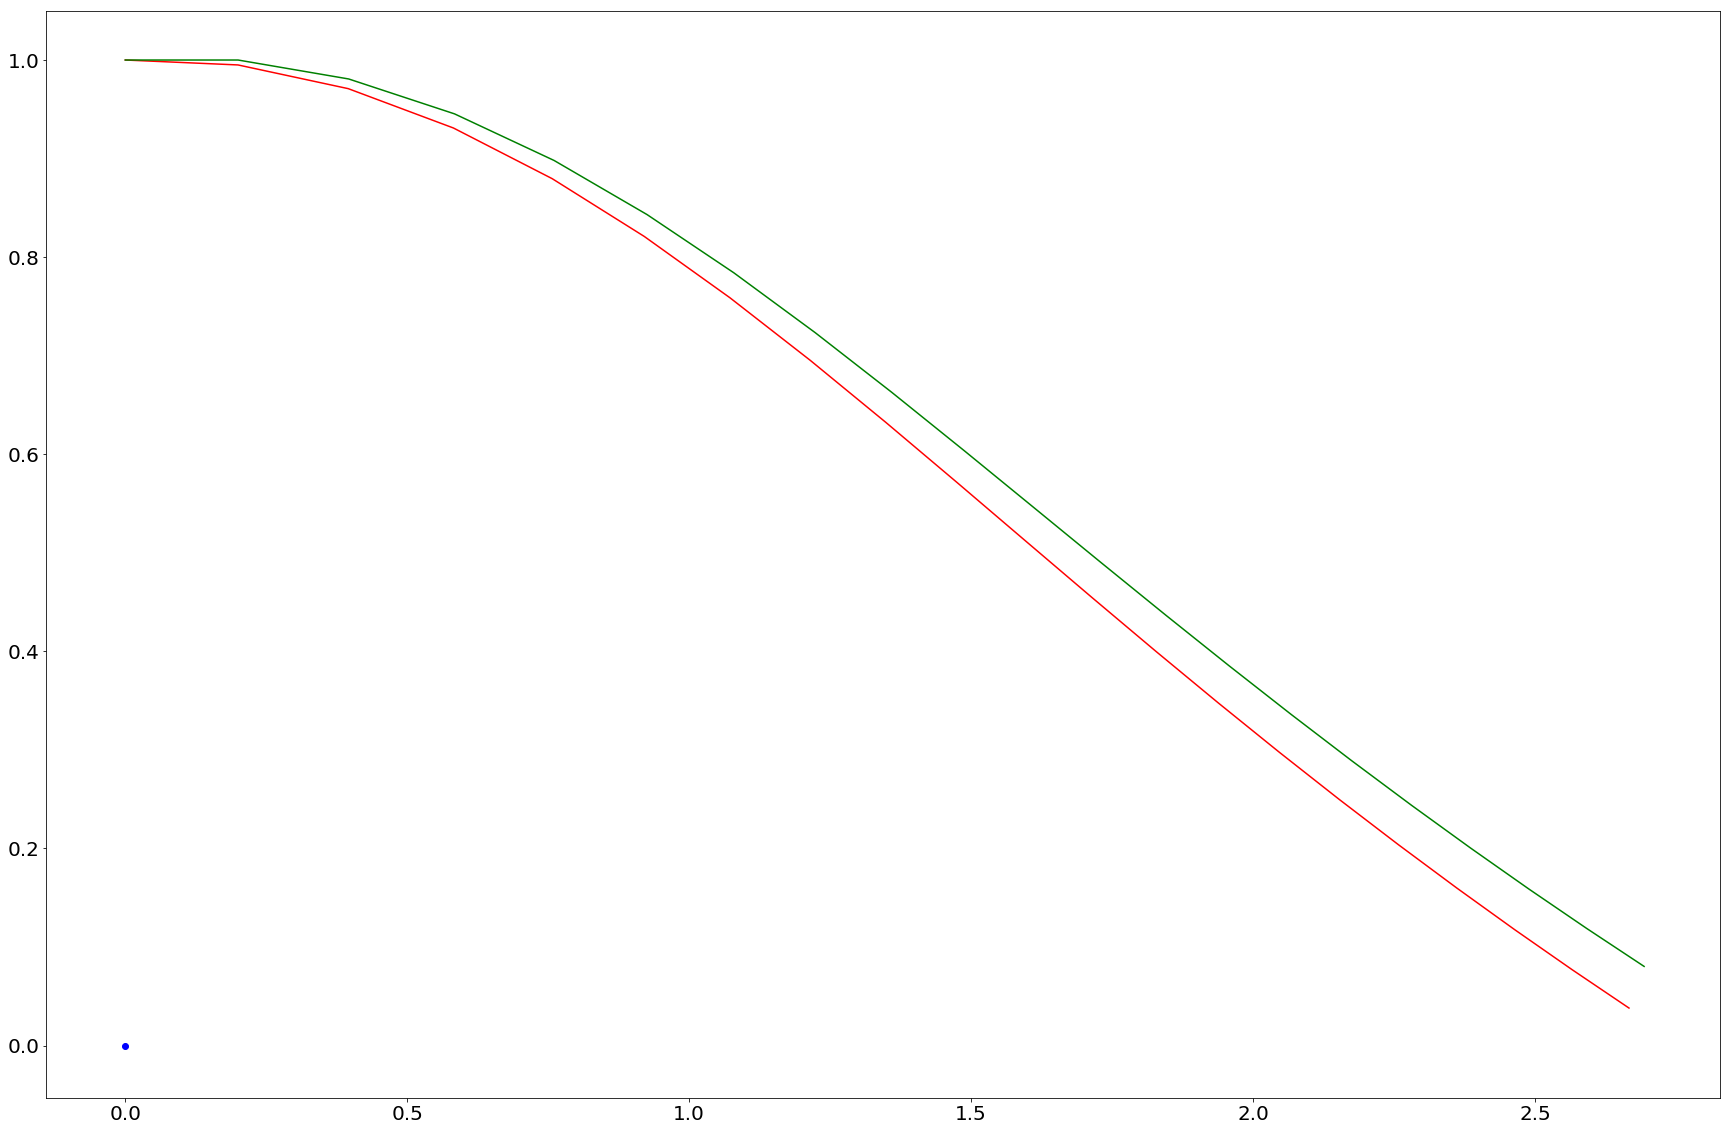

In [19]:
v = Vortex(0, 0, 2 * pi)
model = Model([v], [], 1, 0, 0, 1)
draw_1(model.calculate(2, 0.1), model.calculate_tangent(2, 0.1))

In [6]:
def draw_2(trajectory_1, trajectory_2):
    plt.figure(figsize=(30, 20))
    plt.tick_params(labelsize=20)
    plt.plot(trajectory_1.x, trajectory_1.y, color='r')
    plt.plot(trajectory_2.x, trajectory_2.y, color='g')
    plt.scatter(trajectory_1.vortexes_x[0], trajectory_1.vortexes_y[0], color='b')
    plt.scatter(trajectory_1.vortexes_x[1], trajectory_1.vortexes_y[1], color='b')

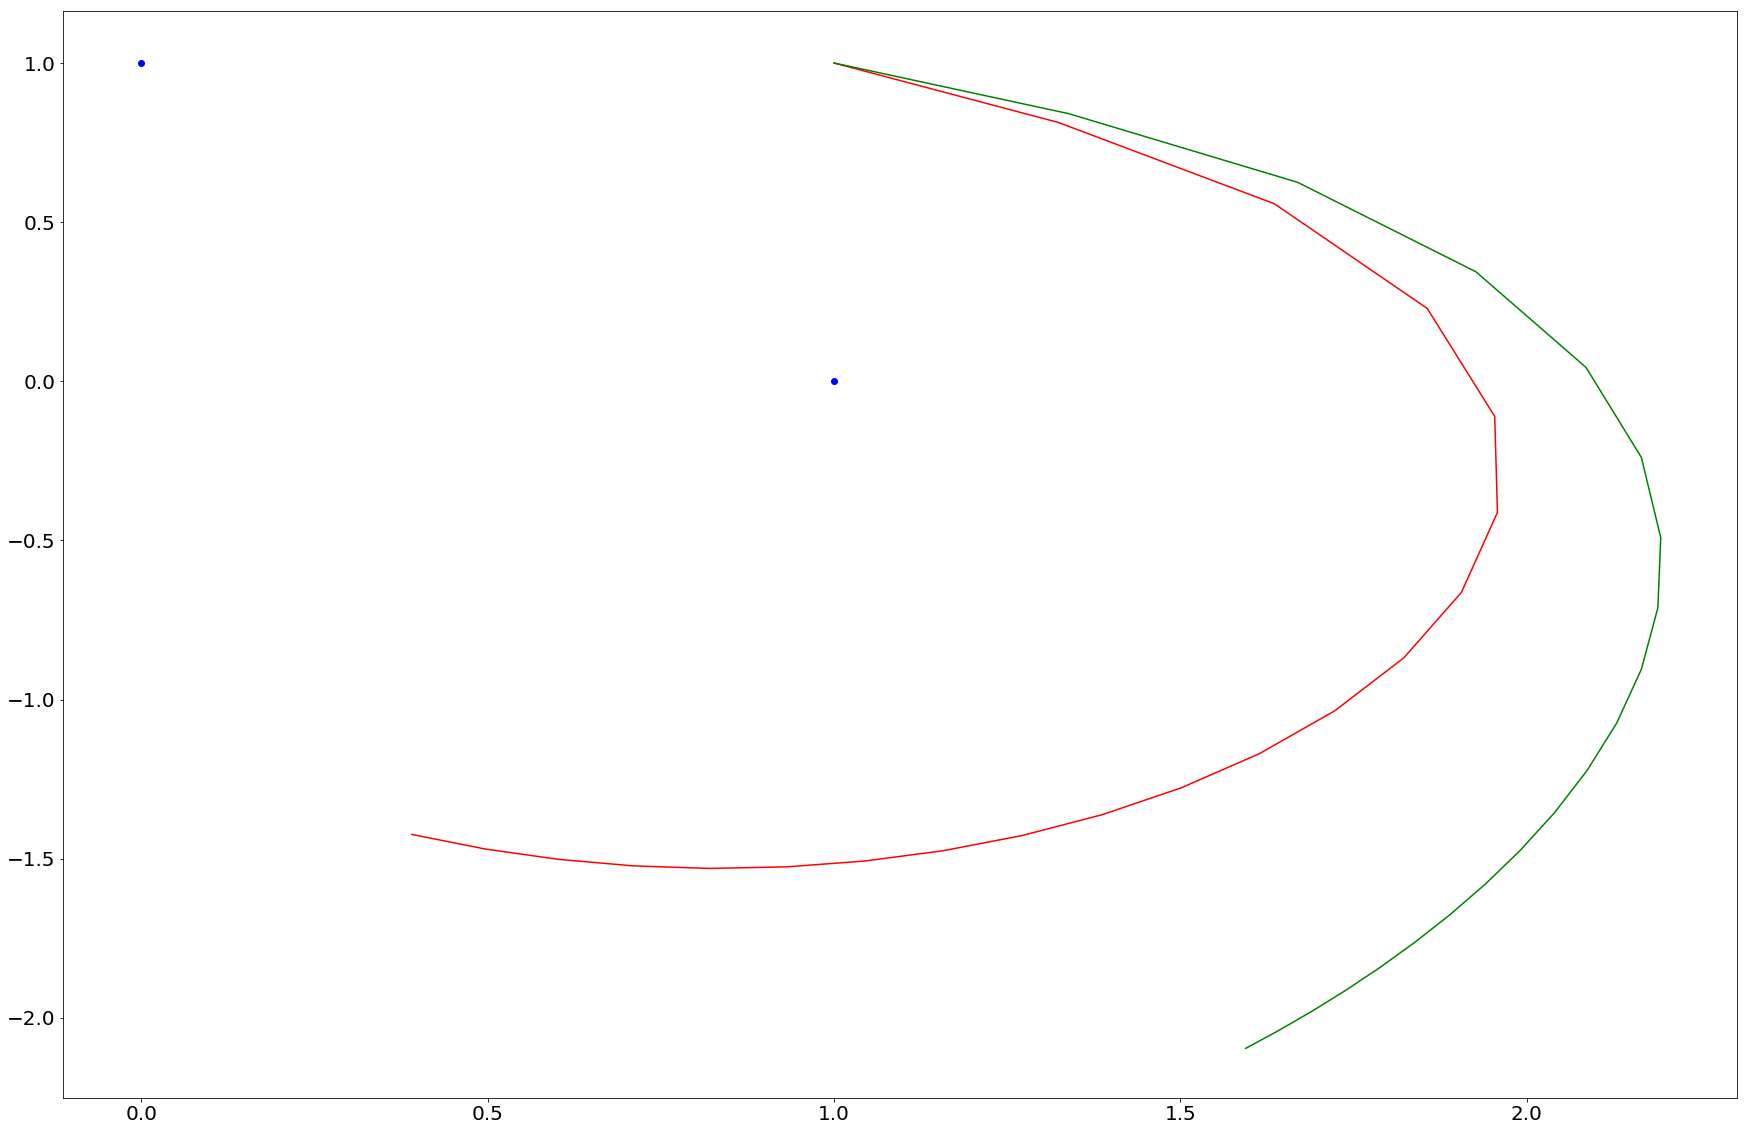

In [22]:
v1 = Vortex(0, 1, 10)
v2 = Vortex(1, 0, 15)
model = Model([v1, v2], [], 1, 0, 1, 1)
draw_2(model.calculate(2, 0.1), model.calculate_tangent(2, 0.1))

In [5]:
class Vortex:
    def __init__(self, x, y, G):
        self.x = x
        self.y = y
        self.G = G
        
    def displace(self, x, y, dt):
        dx = []
        dy = []
        for i in range(len(x)):
            r = sqrt((self.x - x[i])**2 + (self.y - y[i])**2)
            Us = self.G / (2 * pi * r)
            if (y[i] > self.y):
                cur_alpha = acos((x[i] - self.x) / r)
            else:
                cur_alpha = 2 * pi - acos((x[i] - self.x) / r)
            new_alpha = cur_alpha - Us * dt / r
            dx.append(r * cos(new_alpha) - r * cos(cur_alpha))
            dy.append(r * sin(new_alpha) - r * sin(cur_alpha))
            #print("x: ", x[0], " y: ", y[0], " Us: ", Us, " dx:", dx[0], " dy: ", dy[0])
        return dx, dy
                
    def displace_tangent(self, x, y, dt):
        dx = []
        dy = []
        for i in range(len(x)):
            r = sqrt((self.x - x[i])**2 + (self.y - y[i])**2)
            Us = self.G / (2 * pi * r)
            dx.append((Us * (y[i] - self.y) / r) * dt)
            dy.append((Us * (self.x - x[i]) / r) * dt)
        return dx, dy
                
    def get_speed(self, x, y):
        r = sqrt((self.x - x)**2 + (self.y - y)**2)
        if r == 0:
            return [0, 0]  
        Us = self.G / (2 * pi * r)
        dx = Us * (y - self.y) / r
        dy = Us * (self.x - x) / r
        return [dx, dy]

In [11]:
N = 250
m = N + 1
n = N + 2
u_inf = 5
flow_angle = 20 * pi / 180
plate_beg_x = 0.0
plate_end_x = 1.0
plate_beg_y = 0.0
plate_end_y = 0.0
dt = 0.01
T = 2

plate_len = sqrt((plate_end_x - plate_beg_x)**2 + (plate_end_y - plate_beg_y)**2)
gamma = acos((plate_end_x - plate_beg_x) / plate_len) if plate_end_y >= plate_beg_y else \
2 * pi - acos((plate_end_x - plate_beg_x) / plate_len)
free_vortexes = []

x_vortex = [plate_beg_x + (plate_end_x - plate_beg_x) * (i + 0.25) / float(N) for i in range(N)]
y_vortex = [plate_beg_y + (plate_end_y - plate_beg_y) * (i + 0.25) / float(N) for i in range(N)]
x_vortex.append(plate_end_x)
y_vortex.append(plate_end_y)
x_control = [plate_beg_x + (plate_end_x - plate_beg_x) * (i + 0.75) / float(N) for i in range(N)]
y_control = [plate_beg_y + (plate_end_y - plate_beg_y) * (i + 0.75) / float(N)for i in range(N)]
r = np.transpose([[sqrt((y_control[i] - y_vortex[j])**2 + (x_control[i] - x_vortex[j])**2) for i in range(N)] for j in range(N + 1)])
ones = [[1 if i > j else -1 for i in range(N + 1)] for j in range(N)]
A = (ones[:][:]) / (2 * pi * r[:][:])
A = np.append(A, np.ones([1, N + 1], dtype=float), axis=0)
#print(A)

In [12]:
t = 0
while t < T:
    r = [[sqrt((y_control[i] - free_vortexes[j].y)**2 + (x_control[i] - free_vortexes[j].x)**2) for j in range(len(free_vortexes))] for i in range(N)]
    alpha = [[acos((free_vortexes[j].x - x_control[i]) / r[i][j]) if free_vortexes[j].y >= y_control[i] else 2 * pi - acos((free_vortexes[j].x - x_control[i]) / r[i][j]) for j in range(len(free_vortexes))] for i in range(N)]
    free_vortexes_V = [sum([sin(pi / 2 + alpha[i][j] - gamma) * free_vortexes[j].G / (2 * pi * r[i][j]) for j in range(len(free_vortexes))]) for i in range(N)]
    #print(free_vortexes_V)
    b = [-u_inf * sin(flow_angle - gamma) - free_vortexes_V[i] for i in range(N)]
    b.append(0.0)
    vortexes_power = np.linalg.solve(A, b)
    #print(vortexes_power)
    free_vortexes.append(Vortex(plate_end_x, plate_end_y, vortexes_power[N]))
    vortexes = [Vortex(x_vortex[i], y_vortex[i], vortexes_power[i]) for i in range(N)]
    
    t += dt    
    if t >= T:
        break
    
    old_vortexes = free_vortexes
    for i in range(len(old_vortexes)):
        for j in range(len(free_vortexes)):
            if i != j:
                dx, dy = old_vortexes[i].displace([old_vortexes[j].x], [old_vortexes[j].y], dt)
                free_vortexes[j].x += dx[0]
                free_vortexes[j].y += dy[0]

    for i in range(len(vortexes)):
        for j in range(len(free_vortexes)):
                dx, dy = vortexes[i].displace([old_vortexes[j].x], [old_vortexes[j].y], dt)
                free_vortexes[j].x += dx[0]
                free_vortexes[j].y += dy[0]

    for i in range(len(free_vortexes)):
        free_vortexes[i].x += u_inf * cos(flow_angle) * dt
        free_vortexes[i].y += u_inf * sin(flow_angle) * dt

[1.6148013434684574, 1.616514478289807, 1.6213471475308854, 1.6287986355570037, 1.6381641796224, 1.648640341955109, 1.6594378619775585, 1.669879002969794, 1.67946031708054, 1.6878729375679442]


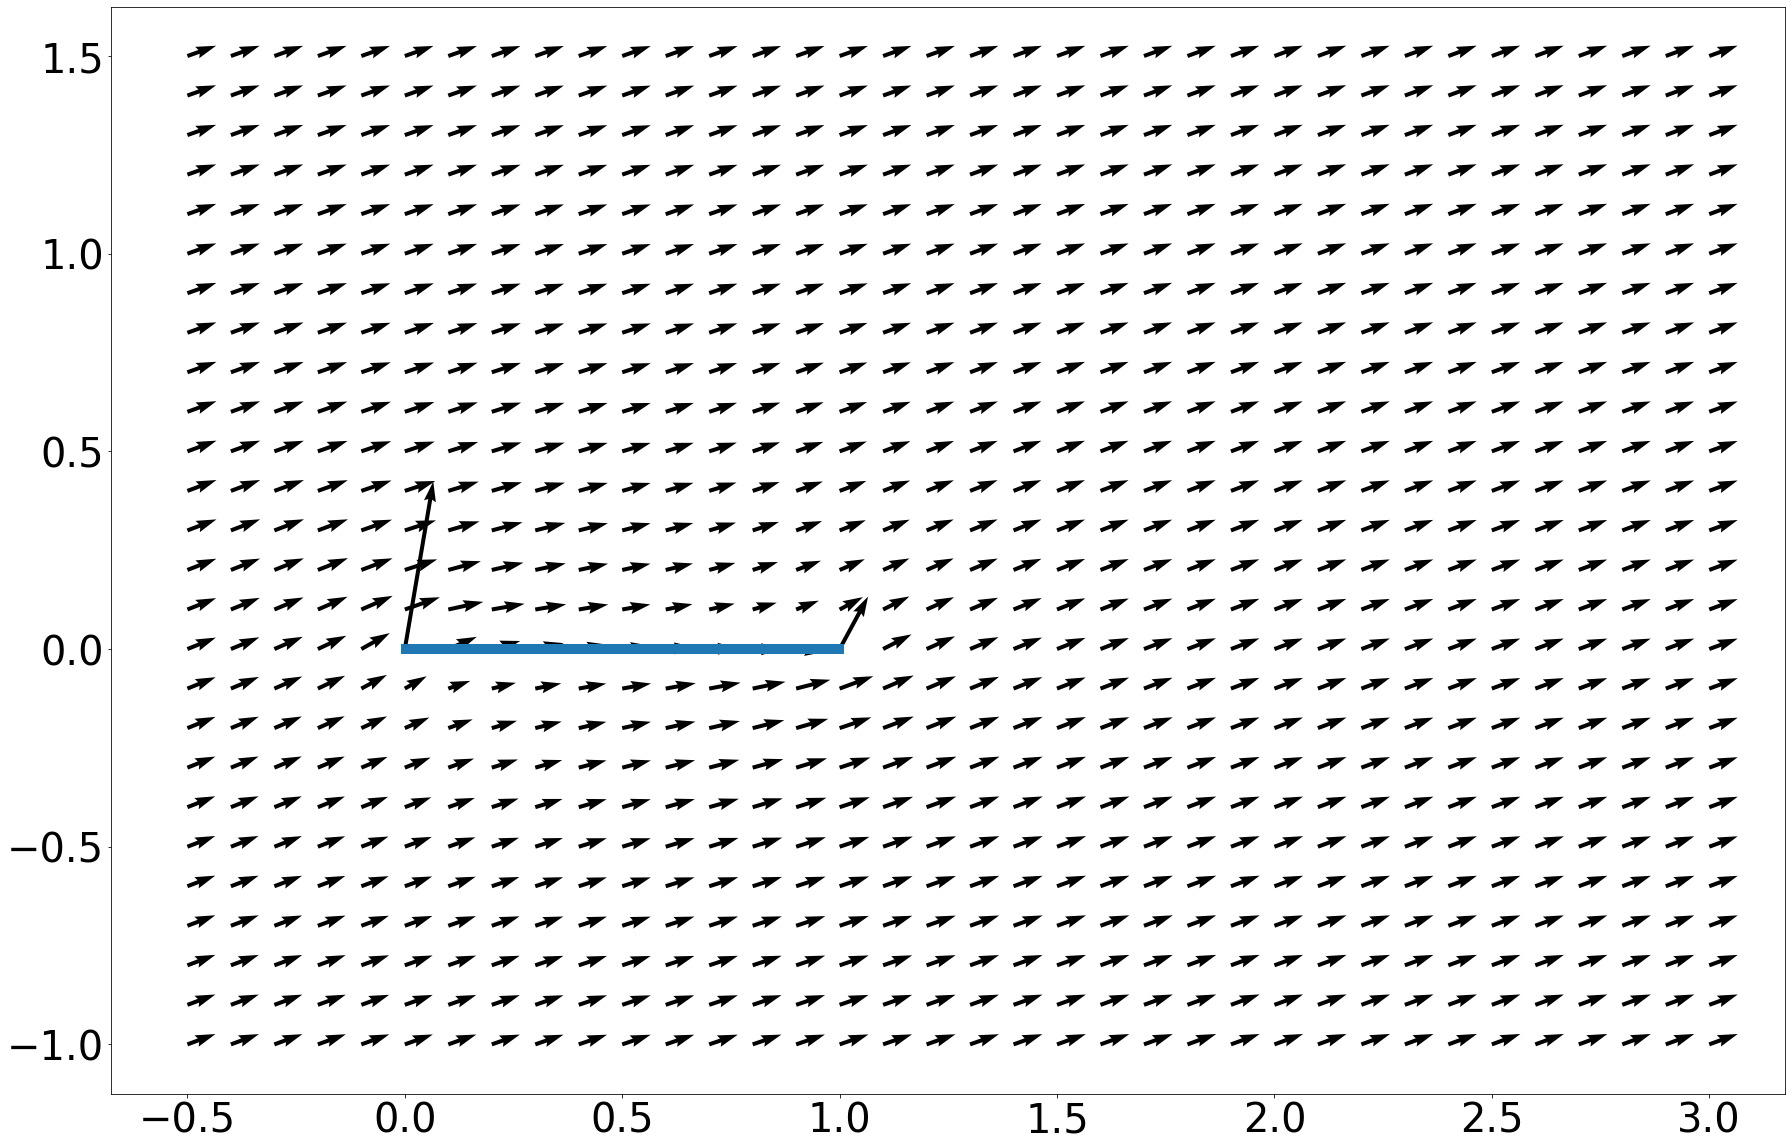

In [13]:
vortexes = vortexes + free_vortexes

xs = -0.5
xe = 3
ys = -1
ye = 1.5
step = 0.1
xn = int((xe - xs) / step) + 1
yn = int((ye - ys) / step) + 1

x = np.linspace(xs, xe, xn)
y = np.linspace(ys, ye, yn)
X, Y = np.meshgrid(x, y)

U = np.zeros((xn,yn))
V = np.zeros((xn,yn))

res = ([[(np.sum([vortexes[k].get_speed(X[j][i], Y[j][i]) for k in range(N + 1)], axis=0)).tolist() for i in range(xn)] for j in range(yn)])
#print(res)

U = [[el[0] + u_inf * cos(flow_angle) for el in arr] for arr in res]
V = [[el[1] + u_inf * sin(flow_angle) for el in arr] for arr in res]
my_pow = np.vectorize(np.vectorize(pow))
my_sqrt = np.vectorize(np.vectorize(sqrt))
#print(my_sqrt(my_pow(U[:][:], 2) + my_pow(V[:][:], 2)))
print(V[21][10:20])

plt.figure(figsize=(30, 20))
plt.tick_params(labelsize=40)
plt.quiver(X, Y, U, V)
plt.plot(x_control, y_control, linewidth=10)
#for v in free_vortexes:
    #print(v.x, " ", v.y)
 #   plt.scatter(v.x, v.y, color='b', s=100)

In [52]:
res = np.sum([vortexes[k].get_speed(x_control[220], y_control[220]) for k in range(len(vortexes))], axis=0)
U = res[0] + u_inf * cos(flow_angle)
V = res[1] + u_inf * sin(flow_angle)
print(U)
print(V)

0.9956730113449686
-2.220446049250313e-16
